In [1]:
import spacy

from prettytable import PrettyTable

from spacy.lang.pt import Portuguese
from spacy import displacy

## Tokenization

In [2]:
nlp = Portuguese()

doc = nlp("O rato roeu a roupa do rei de Roma.")

for token in doc:
    print(token.text)

O
rato
roeu
a
roupa
do
rei
de
Roma
.


### Sentence tokenization

Consist in break the text into sentences. When performing sentence tokenization, the tokenizer looks for specific characters that fall between sentences, like periods, exclaimation points, and newline characters. 


#### Test without pt-BR pipeline

In [3]:
nlp = Portuguese()

# Create the pipeline 'sentencizer' component
sentencizer = nlp.create_pipe('sentencizer')

# Add the component to the pipeline
nlp.add_pipe(sentencizer)

text = 'Messi também concorre no Prêmio Puskàs, de gol mais bonito da temporada, pelo toque de cobertura contra o Bétis, em março. Seus adversários são o colombiano Quintero, pela cobrança de falta pelo River Plate diante do Racing, em fevereiro, e o húngaro Dániel Zsóri, do Debrecen, autor de uma bicicleta contra o Ferencváros. O brasileiro Matheus Cunha, do RB Leipzig, era um dos 10 indicados, mas ficou fora do trio finalista.'

doc = nlp(text)
for sentence in doc.sents:
    if sentence.text.strip():
        print("* %s" % sentence.text.strip())

* Messi também concorre no Prêmio Puskàs, de gol mais bonito da temporada, pelo toque de cobertura contra o Bétis, em março.
* Seus adversários são o colombiano Quintero, pela cobrança de falta pelo River Plate diante do Racing, em fevereiro, e o húngaro Dániel Zsóri, do Debrecen, autor de uma bicicleta contra o Ferencváros.
* O brasileiro Matheus Cunha, do RB Leipzig, era um dos 10 indicados, mas ficou fora do trio finalista.


#### Test with pt-BR pipeline (tokenizer, sentence tokenizer, tagger, parser, NER)

In [4]:
nlp = spacy.load('pt_core_news_sm')

text = 'Messi também concorre no Prêmio Puskàs, de gol mais bonito da temporada, pelo toque de cobertura contra o Bétis, em março. Seus adversários são o colombiano Quintero, pela cobrança de falta pelo River Plate diante do Racing, em fevereiro, e o húngaro Dániel Zsóri, do Debrecen, autor de uma bicicleta contra o Ferencváros. O brasileiro Matheus Cunha, do RB Leipzig, era um dos 10 indicados, mas ficou fora do trio finalista.'

doc = nlp(text)
for sentence in doc.sents:
    if sentence.text.strip():
        print("* %s" % sentence.text.strip())

* Messi também concorre no Prêmio Puskàs, de gol mais bonito da temporada, pelo toque de cobertura contra o Bétis, em março.
* Seus adversários são o colombiano Quintero, pela cobrança de falta pelo River
* Plate diante do Racing, em fevereiro, e o húngaro Dániel Zsóri, do Debrecen, autor de uma bicicleta contra o Ferencváros.
* O brasileiro Matheus Cunha, do RB Leipzig, era um dos 10 indicados, mas ficou fora do trio finalista.


## Removing stopwords

Most text data that we work with is going to contain a lot of words that aren’t actually useful to us. These words, called stopwords, are useful in human speech, but they don’t have much to contribute to data analysis. Removing stopwords helps us eliminate noise and distraction from our text data, and also speeds up the time analysis takes (since there are fewer words to process).

In [5]:
# List some stopwords
stopwords = spacy.lang.pt.stop_words.STOP_WORDS

print('Number of pt-BR stop-words: %d' % len(stopwords))

print('First 20 stop words: %s' % list(stopwords)[:20])

Number of pt-BR stop-words: 413
First 20 stop words: ['tu', 'após', 'coisa', 'inicio', 'tem', 'à', 'sistema', 'sétimo', 'tentei', 'diz', 'quanto', 'cá', 'numa', 'tentar', 'nesse', 'quinze', 'fazer', 'minha', 'pela', 'porém']


Removing stopwords from our data

In [6]:
nlp = Portuguese()

text = 'Messi também concorre no Prêmio Puskàs, de gol mais bonito da temporada, pelo toque de cobertura contra o Bétis, em março.'

doc = nlp(text)

# filtering stop words
sent_no_sw = [token for token in doc if not token.is_stop and not token.is_punct]

print("Sentence without stopwords and punctuation marks:", sent_no_sw)

Sentence without stopwords and punctuation marks: [Messi, concorre, Prêmio, Puskàs, gol, bonito, temporada, toque, cobertura, o, Bétis, março]


If I want to add/remove stopwords...

In [7]:
nlp = Portuguese()

nlp.vocab["não"].is_stop = False
nlp.vocab["gol"].is_stop = True

text = 'Messi também não concorre no Prêmio Puskàs, de gol mais bonito da temporada'

doc = nlp(text)

# filtering stop words and punct marks
sent_no_sw = [token for token in doc if not token.is_stop and not token.is_punct]

print("Sentence without stopwords and punctuation marks:", sent_no_sw)

Sentence without stopwords and punctuation marks: [Messi, não, concorre, Prêmio, Puskàs, bonito, temporada]


## Lexicon Normalization

Lemmatization is a way of dealing with the fact that while words like connect, connection, connecting, connected, etc. aren’t exactly the same, they all have the same essential meaning: connect.

In [8]:
nlp = Portuguese()

doc = nlp("Na categoria de técnicos de equipes femininas, duas mulheres disputam com um homem.")

x = PrettyTable()
x.field_names = ["Text", "Lemma"]

for token in doc:
    x.add_row([token.text, token.lemma_])
    
print(x)  

+-----------+-----------+
|    Text   |   Lemma   |
+-----------+-----------+
|     Na    |     Na    |
| categoria | categoria |
|     de    |     de    |
|  técnicos |  técnico  |
|     de    |     de    |
|  equipes  |  equipar  |
| femininas |  feminino |
|     ,     |     ,     |
|    duas   |    dois   |
|  mulheres |   mulher  |
|  disputam |  disputar |
|    com    |    com    |
|     um    |     um    |
|   homem   |   homem   |
|     .     |     .     |
+-----------+-----------+


Stemming involves simply lopping off easily-identified prefixes and suffixes to produce what’s often the simplest version of a word. Connection, for example, would have the -ion suffix removed and be correctly reduced to connect. However, spaCy **doesn't contain any function for stemming** as it relies on lemmatization only. Therefore, in this section, we will use NLTK for stemming. You need to use NLTK stemmer

**OBS:** lemmatization is more precise than stemming!!!

## Part of Speech (POS) Tagging

A word’s part of speech defines its function within a sentence. A noun, for example, identifies an object. 
An adjective describes an object. A verb describes action. Identifying and tagging each word’s part of 
speech in the context of a sentence is called Part-of-Speech Tagging, or POS Tagging.

We’ll need to import its `pt_core_news_sm`model, because that contains the dictionary and grammatical 
information required to do this analysis. Then all we need to do is load this model with .load() and 
loop through our new docs variable, identifying the part of speech for each word using .pos_.

In [9]:
nlp = spacy.load('pt_core_news_sm')

text = "O rato roeu a roupa do rei de Roma."

doc = nlp(text)

x = PrettyTable()
x.field_names = ["Text", "POS", "Tag"]
x.align["Tag"] = "l"

for token in doc:
    x.add_row([token.text, token.pos_, token.tag_])
    
print(x)    

+-------+-------+--------------------------+
|  Text |  POS  | Tag                      |
+-------+-------+--------------------------+
|   O   |  DET  | <artd>|ART|M|S|@>N       |
|  rato |  NOUN | <np-def>|N|M|S|@SUBJ>    |
|  roeu |  VERB | <mv>|V|PR|3S|IND|@FS-STA |
|   a   |  DET  | <artd>|ART|F|S|@>N       |
| roupa |  NOUN | <np-def>|N|F|S|@<ACC     |
|   do  |  DET  | <artd>|ART|M|P|@>N       |
|  rei  |  NOUN | <np-def>|N|M|S|@<ACC     |
|   de  |  ADP  | PRP|@N<                  |
|  Roma | PROPN | PROP|M|S|@P<             |
|   .   | PUNCT | PU|@PU                   |
+-------+-------+--------------------------+


In [10]:
nlp = spacy.load('pt_core_news_sm')

doc = nlp("Eu gosto do gosto da uva.")

x = PrettyTable()
x.field_names = ["Text", "POS", "Tag"]
x.align["Tag"] = "l"

for token in doc:
    x.add_row([token.text, token.pos_, token.tag_])
    
print(x)

+-------+-------+--------------------------+
|  Text |  POS  | Tag                      |
+-------+-------+--------------------------+
|   Eu  |  PRON | PERS|M|1S|NOM|@SUBJ>     |
| gosto |  VERB | <mv>|V|PR|1S|IND|@FS-STA |
|   do  |  DET  | <artd>|ART|M|S|@>N       |
| gosto |  NOUN | <np-idf>|N|M|S|@<ACC     |
|   da  |  ADP  | PRP|@N<                  |
|  uva  |  NOUN | <np-idf>|N|F|S|@P<       |
|   .   | PUNCT | PU|@PU                   |
+-------+-------+--------------------------+


## Named Entity Recognition (NER)

In [11]:
nlp = spacy.load('pt_core_news_sm')

In [12]:
text = "O Fantástico teve acesso exclusivo à investigação da Aeronáutica que apontou que o sargento Manoel Silva Rodrigues, preso na Espanha em junho com 39 kg de cocaína, entrou no avião ainda desligado e não passou a bagagem pelos procedimentos de segurança previstos. O militar estava na comitiva presidencial que levava o presidente Jair Bolsonaro – que estava em outra aeronave – ao encontro do G20 no Japão."

doc = nlp(text)

In [13]:
displacy.render(doc, style = "ent",jupyter = True)

## Dependency Parsing

Depenency parsing is a language processing technique that allows us to better determine the meaning 
of a sentence by analyzing how it’s constructed to determine how the individual words relate to each other.

Consider, for example, the sentence “Bill throws the ball.” We have two nouns (Bill and ball) 
and one verb (throws). But we can’t just look at these words individually, or we may end up thinking that 
the ball is throwing Bill! To understand the sentence correctly, we need to look at the word order 
and sentence structure, not just the words and their parts of speech.

In [14]:
nlp = spacy.load('pt_core_news_sm')

text = "O rato roeu a roupa do rei de Roma."

doc = nlp(text)

In [15]:
displacy.render(doc, style="dep", jupyter= True)

# Text Classification

In [18]:
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [19]:
from nltk.corpus import machado

In [20]:
machado.categories()

['contos',
 'critica',
 'cronica',
 'miscelanea',
 'poesia',
 'romance',
 'teatro',
 'traducao']

In [21]:
data = list()
for cat in machado.categories():
    for doc in machado.fileids(categories=cat):
        data.append([cat, doc])
data = pd.DataFrame(data, columns=['categoria', 'filename'])
data.head()

,categoria,filename
0,contos,contos/macn001.txt
1,contos,contos/macn002.txt
2,contos,contos/macn003.txt
3,contos,contos/macn004.txt
4,contos,contos/macn005.txt


In [22]:
data.groupby('categoria').count()

,filename
categoria,
contos,137
critica,45
cronica,24
miscelanea,10
poesia,7
romance,10
teatro,10
traducao,3


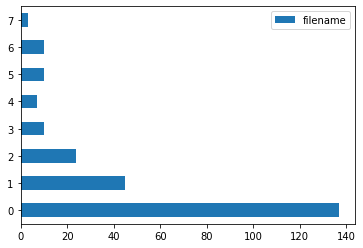

In [24]:
data.groupby('categoria').count().reset_index().plot(kind='barh')

In [25]:
def read_machado():
    """ Load "Machado de Assis" corpus
    """
    labels = machado.categories()
    data = list()
    for l in labels:
        text_ids = machado.fileids(categories=l)
        data.extend([(machado.raw(fileids=tid), l) for tid in text_ids])
        
    return data

In [ ]:
def extract_features(documents):
    """ Extract features """
    processor = TextProcessor()
    
    # Other options: CountVectorizer, TfidfVectorizer
    
    extractor = HashingVectorizer(analyzer=processor.process)
    
    return extractor.fit_transform([t for t, _ in documents])

In [ ]:
class TextProcessor(object):
    """ Class for text processing. """
    def __init__(self):
        self.stemer = RSLPStemmer()
        # Podemos definir mais alguns processo aqui, como um tagger, ...

    def process(self, document):
        # lendo todas as palavras do documento
        tokens = [
            re.sub('\d+[,.]?\d+', '0', t)
            for sent in sent_tokenize(document)
            for t in word_tokenize(sent)]

        return [
            self.stemer.stem(t)
            for t in tokens
            if t not in stopwords.words('portuguese')]


In [ ]:
data = read_machado()
features = extract_features(data).toarray()

In [ ]:
data[0]

In [ ]:
import numpy
labels = numpy.array([l for _, l in data])

# Somente para garantir a distribuição das classes
folds = StratifiedKFold(2)
exp_idx = [(train, test) for (train, test) in folds.split(data, labels)]
train, test = exp_idx[0]

clf = RandomForestClassifier()
clf.fit(features[train], labels[train])
predictions = clf.predict(features[test])

print(classification_report(labels[test], predictions))